<a href="https://colab.research.google.com/github/AbelPhilippe/Fraud-Transaction-Predicts-Finances-/blob/main/Fraud_Financial_Transaction_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBS**

In [ ]:
import os
import pandas as pd
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# **DATA VISUALIZATION (TRAIN)**

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.683333,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.543333,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.603333,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0


In [ ]:
df = df.drop(['id', 'Group'], axis=1)

In [ ]:
df.duplicated().sum()


np.int64(6459)

In [ ]:
df = df.drop_duplicates()
df

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,0.356667,0.530000,...,0.683333,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0
227841,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,0.806667,0.436667,...,0.543333,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0
227842,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,0.630000,0.870000,...,0.603333,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0
227843,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,1.020000,0.413333,...,0.606667,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0


In [ ]:
df.isnull().sum()

,0
Per1,0
Per2,0
Per3,0
Per4,0
Per5,0
Per6,0
Per7,0
Per8,0
Per9,0
Dem1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221386 entries, 0 to 227844
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Per1            221386 non-null  float64
 1   Per2            221386 non-null  float64
 2   Per3            221386 non-null  float64
 3   Per4            221386 non-null  float64
 4   Per5            221386 non-null  float64
 5   Per6            221386 non-null  float64
 6   Per7            221386 non-null  float64
 7   Per8            221386 non-null  float64
 8   Per9            221386 non-null  float64
 9   Dem1            221386 non-null  float64
 10  Dem2            221386 non-null  float64
 11  Dem3            221386 non-null  float64
 12  Dem4            221386 non-null  float64
 13  Dem5            221386 non-null  float64
 14  Dem6            221386 non-null  float64
 15  Dem7            221386 non-null  float64
 16  Dem8            221386 non-null  float64
 17  Dem9           

In [ ]:
df.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
count,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,...,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000,221386.000000
mean,0.655056,0.667029,0.673937,0.665595,0.663279,0.662806,0.669405,0.664327,0.663035,0.664490,...,0.667419,0.668222,0.666170,0.664154,0.665285,0.666825,0.667156,0.667053,-227.464863,0.001744
std,0.652195,0.553015,0.503465,0.474465,0.460411,0.438709,0.416830,0.403046,0.366974,0.340566,...,0.245978,0.242339,0.209599,0.202105,0.175036,0.161365,0.134906,0.112425,62.618555,0.041720
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-10.943333,-2.296667,-14.270000,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,0.000000
25%,0.353333,0.463333,0.383333,0.380000,0.433333,0.410000,0.483333,0.596667,0.446667,0.410000,...,0.590000,0.490000,0.610000,0.546667,0.560000,0.556667,0.643333,0.650000,-248.450000,0.000000
50%,0.650000,0.690000,0.733333,0.656667,0.646667,0.576667,0.680000,0.673333,0.646667,0.653333,...,0.656667,0.670000,0.663333,0.680000,0.670000,0.650000,0.666667,0.670000,-244.177500,0.000000
75%,1.100000,0.940000,1.016667,0.916667,0.870000,0.796667,0.860000,0.773333,0.863333,0.913333,...,0.730000,0.843333,0.716667,0.810000,0.783333,0.746667,0.696667,0.693333,-230.125000,0.000000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,9.733333,4.166667,8.176667,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,1.000000


In [ ]:
print(df.columns)

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'Target'],
      dtype='object')


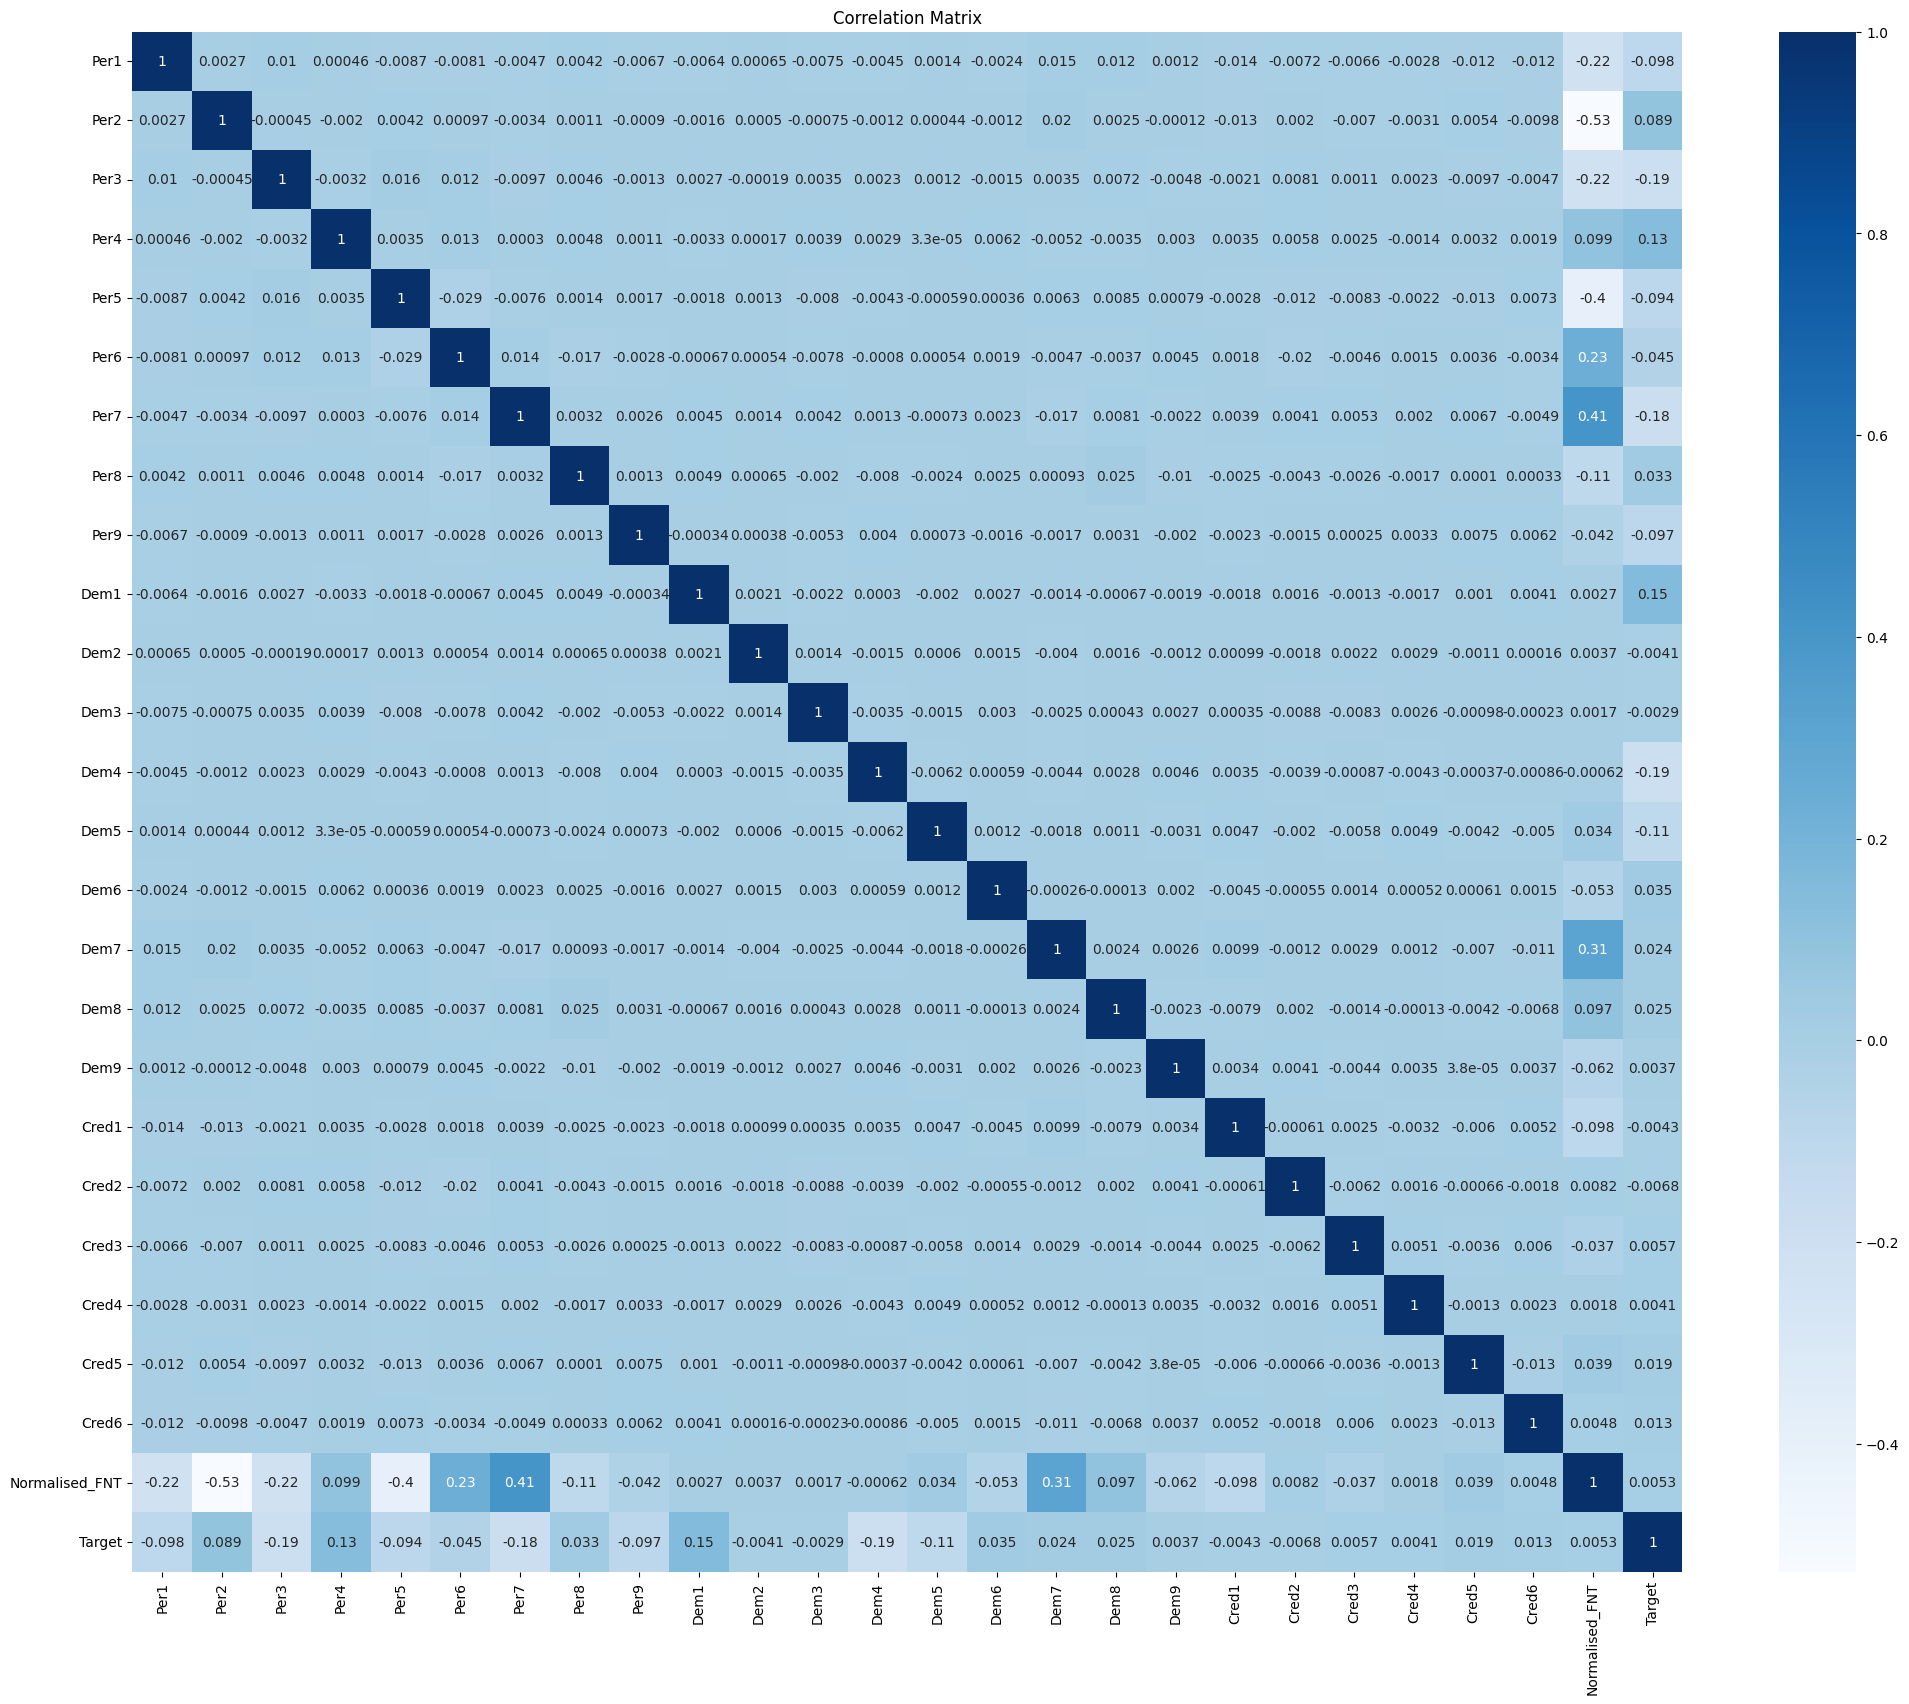

In [ ]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot = True, cmap="Blues")
sns.color_palette("mako", as_cmap=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
graph = px.pie(df, names='Target', title='Target Distribution')
graph.show()

# **DATA STANDARLIZATION**

# **Severe Class Imbalance:** Only a tiny fraction (less than 1%) of transactions are fraud.

# **Multiple Feature Files:** Combine them by matching on id or Group.

# **Target**: The Target column in train.csv indicates fraud (1) vs. clean (0).

# **Goal:** Predict which transactions in test_share.csv might be fraudulent.

In [ ]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
non_binary_cols = [col for col in df.columns if col not in binary_cols]

scaler = StandardScaler()
df[non_binary_cols] = scaler.fit_transform(df[non_binary_cols])

In [ ]:
X = df.drop(columns=["Target"])
y = df["Target"]

# X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

--- Class distribution in y_train before oversampling ---
Target
0    176789
1       319
Name: count, dtype: int64


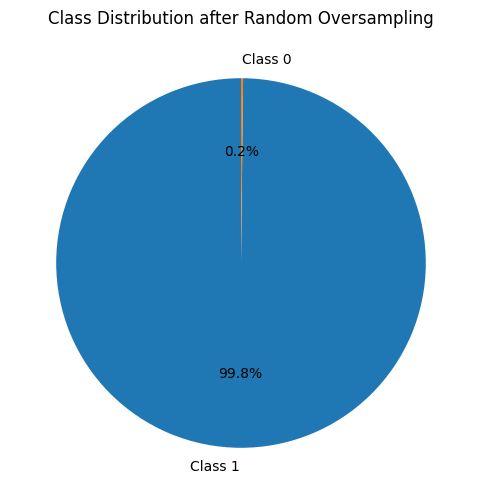


--- Class distribution in y_train after oversampling ---
Target
0    176789
1    176789
Name: count, dtype: int64


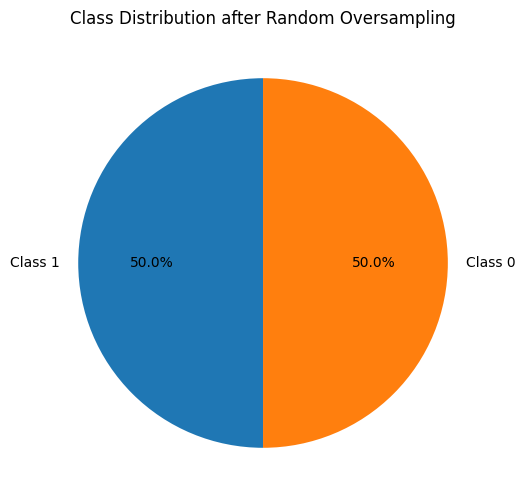

In [ ]:
print("--- Class distribution in y_train before oversampling ---")
print(y_train.value_counts())
plt.figure(figsize=(8, 6))
plt.pie(y_train.value_counts(), labels=['Class 1', 'Class 0'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution after Random Oversampling')
plt.show()

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("\n--- Class distribution in y_train after oversampling ---")
print(y_train_res.value_counts())
plt.figure(figsize=(8, 6))
plt.pie(y_train_res.value_counts(), labels=['Class 1', 'Class 0'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution after Random Oversampling')
plt.show()

In [ ]:
X_train = X_train_res
y_train = y_train_res

# **OUTLIERS**

In [ ]:
def iqr_cap(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_limit = q1 - (1.5 * iqr)
            upper_limit = q3 + (1.5 * iqr)
            df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
            df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

iqr_cap(X_train)
iqr_cap(X_test)

In [ ]:
X_train, y_train

(            Per1      Per2      Per3      Per4      Per5      Per6      Per7  \
 0      -0.207079  0.312778  1.170682  0.915571  0.405554  0.107575  0.369284   
 1      -0.237745  0.608130 -0.305757 -0.433321  0.999227 -0.751006  0.761130   
 2      -0.437072  0.529771  0.833021 -0.447372  0.745830 -0.135563  0.609190   
 3      -0.426850  0.620185 -0.285894  0.114666  1.723219  1.786747 -0.078541   
 4      -0.048639  0.843205  0.177562  0.789112  0.782030 -0.545858  1.232946   
 ...          ...       ...       ...       ...       ...       ...       ...   
 353573 -3.575199  2.060774 -6.324064  3.704685 -2.903089 -2.171844 -5.596385   
 353574 -0.871503  0.807039 -0.365344  2.250411 -0.296718 -0.948556 -1.877838   
 353575 -3.948299  4.209604 -8.585067  4.336978 -3.511242 -2.832875 -5.984233   
 353576 -1.024832  0.945674 -1.583571 -0.398194 -1.513024 -0.120367 -2.437619   
 353577 -3.948299  4.209604 -8.585067  6.254934 -3.511242 -0.925762 -5.984233   
 
             Per8      Per

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1500, verbose=False, tol=0.00000100),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

Decision Tree classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44211
           1       0.64      0.70      0.67        67

    accuracy                           1.00     44278
   macro avg       0.82      0.85      0.83     44278
weighted avg       1.00      1.00      1.00     44278

[[44184    27]
 [   20    47]]


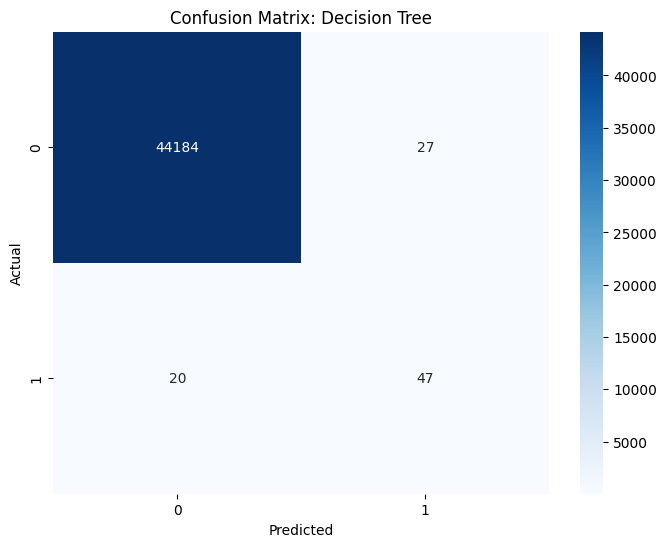

Random Forest classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44211
           1       0.87      0.69      0.77        67

    accuracy                           1.00     44278
   macro avg       0.93      0.84      0.88     44278
weighted avg       1.00      1.00      1.00     44278

[[44204     7]
 [   21    46]]


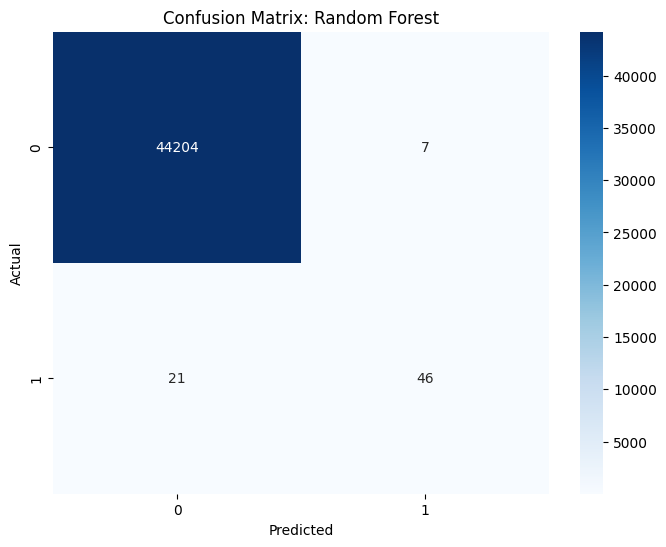

Naive Bayes classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     44211
           1       0.13      0.84      0.22        67

    accuracy                           0.99     44278
   macro avg       0.56      0.91      0.61     44278
weighted avg       1.00      0.99      0.99     44278

[[43836   375]
 [   11    56]]


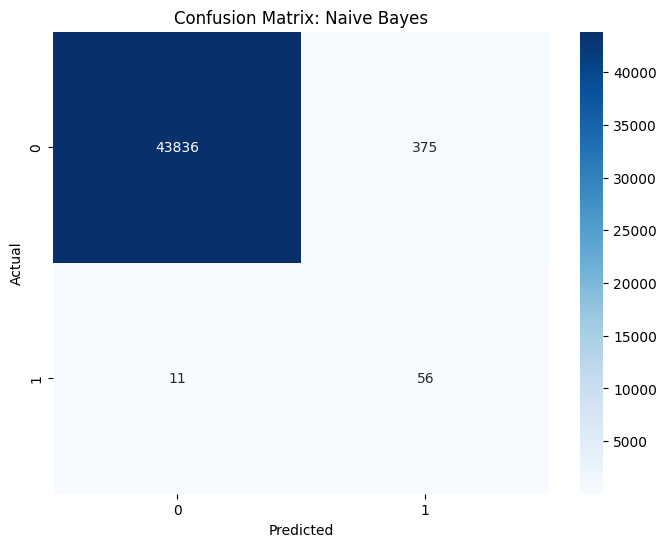

Neural Network classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44211
           1       0.53      0.55      0.54        67

    accuracy                           1.00     44278
   macro avg       0.76      0.78      0.77     44278
weighted avg       1.00      1.00      1.00     44278

[[44178    33]
 [   30    37]]


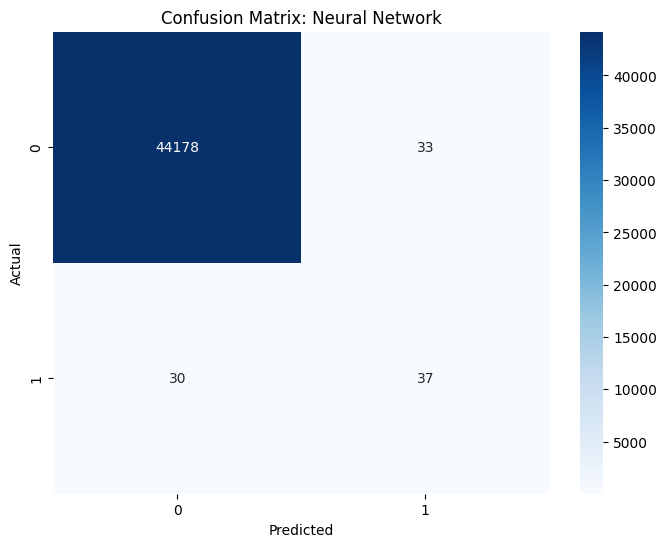

XGBoost classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     44211
           1       0.16      0.85      0.26        67

    accuracy                           0.99     44278
   macro avg       0.58      0.92      0.63     44278
weighted avg       1.00      0.99      1.00     44278

[[43902   309]
 [   10    57]]


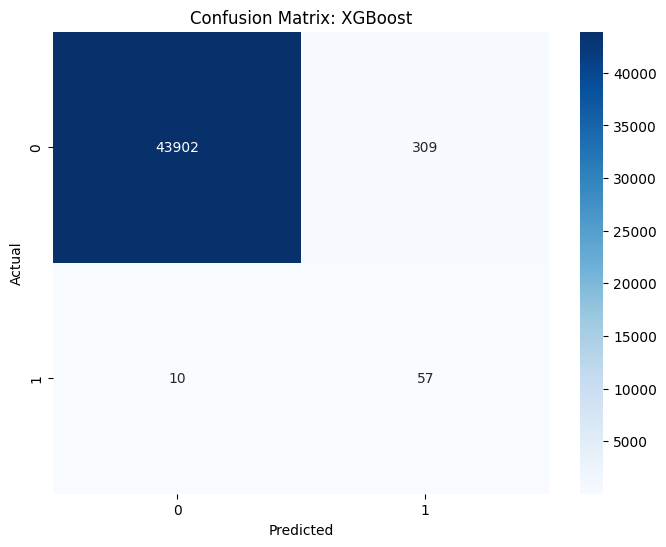

In [ ]:
for name, model in models.items():
  print(name + " classification report")
  model.fit(X_train, y_train)
  predicts = model.predict(X_test)
  print(classification_report(y_test, predicts))
  cm = confusion_matrix(y_test, predicts)
  print(confusion_matrix(y_test, predicts))
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels = ['0', '1'],
              yticklabels = ['0', '1'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix: " + name)
  plt.show()